In [1]:
import numpy as np
import matplotlib.pyplot as plt
from translator import *
import glob

In [2]:
filelist = glob.glob('11 C9*')
ss, q, chi, data = load_npy(filelist[0],2)

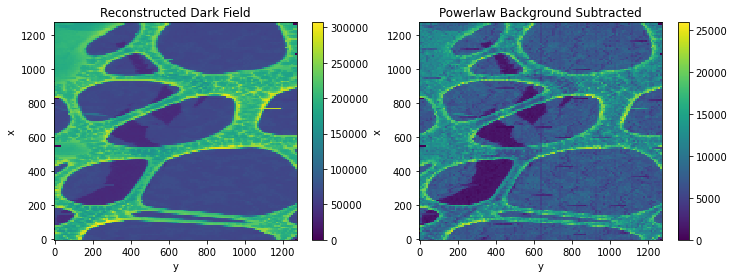

In [3]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
df_data = dark_field(ss,data)
df_data.plot(ax=ax[0])
ax[0].set_title('Reconstructed Dark Field')
data_sub = subtract_powerlaw(q, data,qmin_exclude=1)
df_datasub = dark_field(ss,data_sub)
df_datasub.plot(ax=ax[1])
ax[1].set_title('Powerlaw Background Subtracted')
plt.show()

In [4]:
peaks, num_peaks, data_1d = peak_finder(q, chi, data_sub,qmin_exclude=1.3,prominence=10)
gauss_params = fit_peaks(chi, data_1d, peaks, num_peaks)

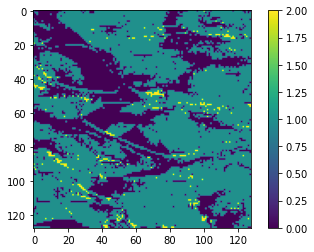

In [5]:
implot(num_peaks)
plt.colorbar()

In [6]:
gpos, gint, gfwhm, bck = list_to_array(gauss_params)

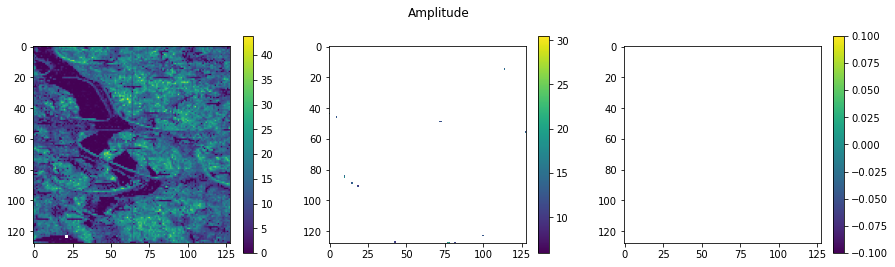

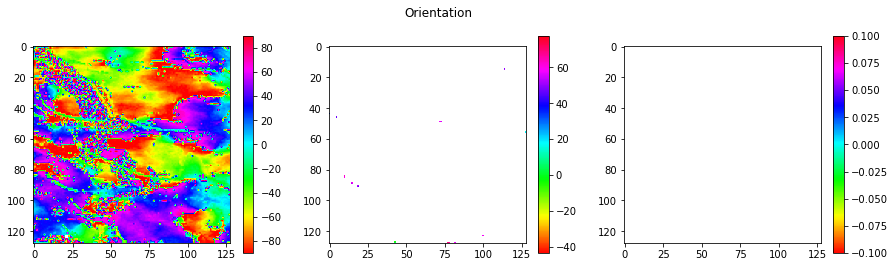

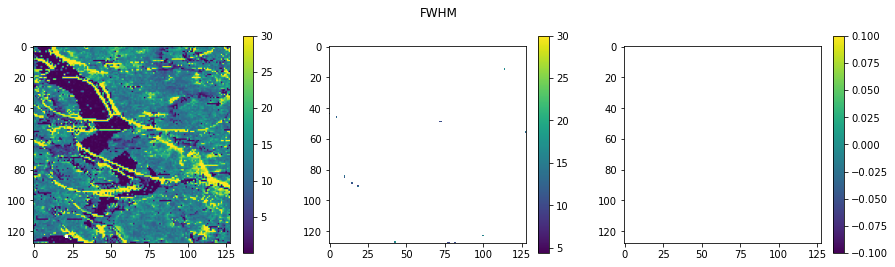

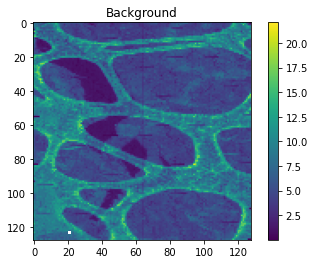

In [16]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
for i in np.arange(0,3):
    im = ax[i].imshow(np.reshape(gint[:,i],(128,128)))
    plt.colorbar(im,ax=ax[i])
plt.suptitle('Amplitude')
plt.show()
fig, ax = plt.subplots(1,3,figsize=(15,4))
for i in np.arange(0,3):
    im = ax[i].imshow(np.reshape(gpos[:,i],(128,128)),cmap='hsv')
    plt.colorbar(im,ax=ax[i])
plt.suptitle('Orientation')
plt.show()
fig, ax = plt.subplots(1,3,figsize=(15,4))
for i in np.arange(0,3):
    im = ax[i].imshow(np.reshape(gfwhm[:,i],(128,128)))
    plt.colorbar(im,ax=ax[i])
plt.suptitle('FWHM')
plt.show()
implot(bck)
plt.title('Background')
plt.colorbar()
plt.show()

C:\Users\pete\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pete\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


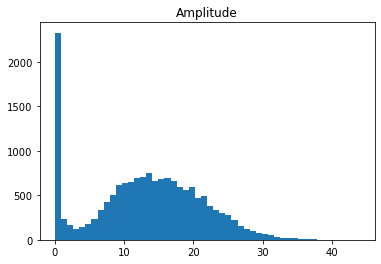

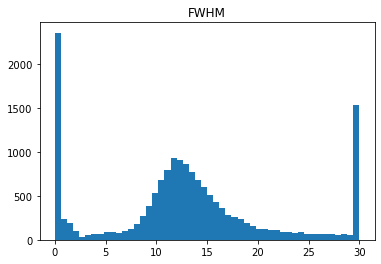

In [8]:
bins = plt.hist(gint[:,0],bins=50)
plt.title('Amplitude')
plt.show()
bins = plt.hist(gfwhm[:,0],bins=50)
plt.title('FWHM')
plt.show()

* Mask out high/low FWHM and low intensity

C:\Users\pete\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
C:\Users\pete\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


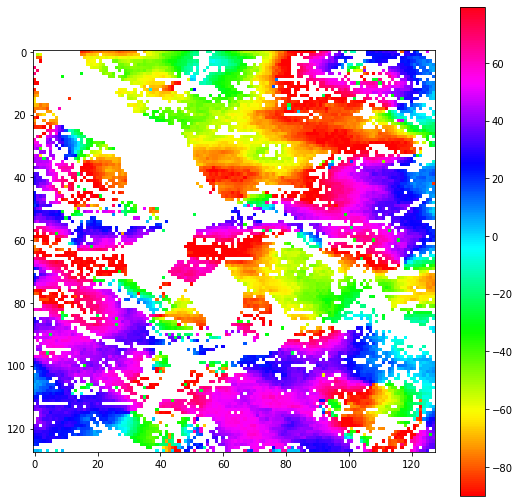

In [9]:
fwhm_mask = (gfwhm[:,0] < 5) | (gfwhm[:,0] > 20) | (gint[:,0] < 5)
orientation_array = gpos[:,0].copy()
orientation_array[fwhm_mask] = np.nan
plt.figure(figsize=(9,9))
implot(orientation_array,cmap='hsv')
plt.colorbar()
plt.show()

In [10]:
from crystalgrowth import *
orientation_array = np.reshape(orientation_array,(128,128))
healed_array = grow_complete(np.deg2rad(orientation_array),growth_anisotropy=3)

D:\NIST\4DSTEM\Data\crystalgrowth.py:84: RuntimeWarning: invalid value encountered in greater
  grow_array[grow_array > np.pi/2] %= -np.pi/2
D:\NIST\4DSTEM\Data\crystalgrowth.py:85: RuntimeWarning: invalid value encountered in less
  grow_array[grow_array < -np.pi/2] %= np.pi/2


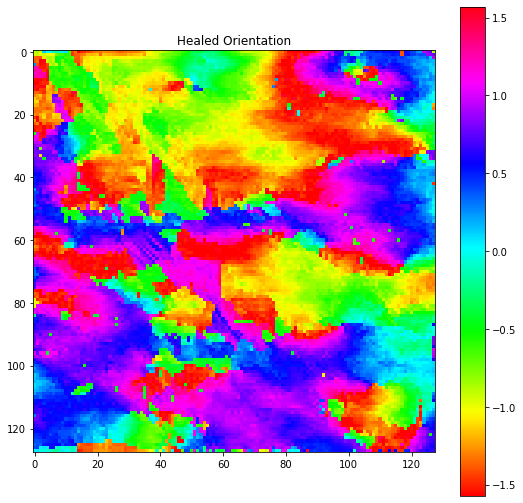

In [11]:
plt.figure(figsize=(9,9))
plt.imshow(healed_array,cmap='hsv')
plt.colorbar()
plt.title('Healed Orientation')
plt.show()

In [15]:
fname = write_orientation_hdf5(healed_array,10,'pbttt_test.hdf5',author='PJD',polymer='PBTTT')

--> Marking pbttt_test.hdf5


## Example of synthetic morphology

C:\Users\pete\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in greater
C:\Users\pete\anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in less


almost done


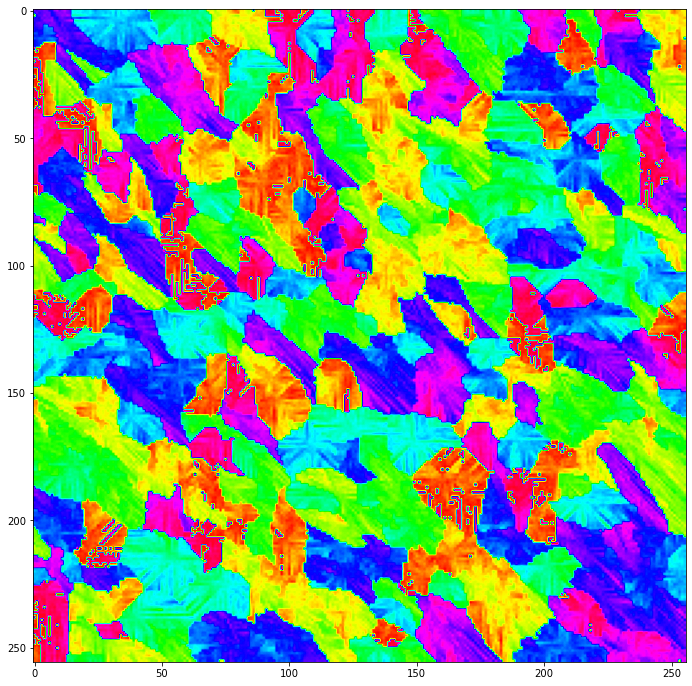

In [60]:
nuc_array = np.empty((256,256))
nuc_array[:] = np.nan
nuc_array, pos, orients = nucleate(nuc_array,250)
grown_array = grow_complete(nuc_array,growth_anisotropy=2,pi_mutate=np.deg2rad(5),c_mutate=np.deg2rad(5))
plt.figure(figsize=(12,12))
plt.imshow(grown_array,cmap='hsv')
plt.show()